# 逻辑回归（分类）
- linear_model.LogisticRegression()


In [1]:
import numpy as np
from sklearn import datasets, metrics, model_selection, linear_model

import matplotlib.pyplot as plt
%matplotlib inline

## 数据集：鸢尾花分类

In [2]:
iris = datasets.load_iris()
# print(dir(iris))  # ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
# print('data shape', iris.data.shape)  # data shape (150, 4)
# print('target shape', iris.target.shape)  # target shape (150,)
# print('feature names:', iris.feature_names)  # feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print('kinds:', np.unique(iris.target))  # 品种数量kinds: [0 1 2]

In [31]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42
)

In [32]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(135, 4) (135,) (15, 4) (15,)


## sklearn——LogisticRegression

In [33]:
logicreg = linear_model.LogisticRegression()  # 实例化分类算法对象
logicreg.fit(x_train, y_train)
y_pred = logicreg.predict(x_test)

/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
print(y_pred)
print(y_test)
print(y_pred == y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [6]:
# score: 准确率
print(logicreg.score(x_train, y_train))
print(logicreg.score(x_test, y_test))

0.9703703703703703
1.0


## opencv——LogisticRegression

In [3]:
import cv2
lr = cv2.ml.LogisticRegression_create()

In [4]:
# 制定训练方法
# cv2.ml.LogisticRegression_BATCH
# cv2.ml.LogisticRegression_MINI_BATCH 使用每个数据点后都更新一次模型
lr.setTrainMethod(cv2.ml.LogisticRegression_MINI_BATCH)

In [5]:
# 训练100次
lr.setIterations(100)

### opencv对数据格式要求比较严格，需要转换

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    iris.data.astype(np.float32), iris.target.astype(np.float32), test_size=0.1, random_state=42
)

In [7]:
lr.train(x_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [8]:
# 检索权重
lr.get_learnt_thetas()

array([[ 0.02863388, -0.00950859,  0.12827702, -0.29083425, -0.12750874],
       [-0.03015282, -0.07588016, -0.10545424,  0.03446789,  0.00380539],
       [-0.07290097, -0.11728643, -0.1474613 ,  0.16710688,  0.10097289]],
      dtype=float32)

In [9]:
# 测试
ret, y_pred = lr.predict(x_test)

In [10]:
metrics.accuracy_score(y_test, y_pred)

0.6

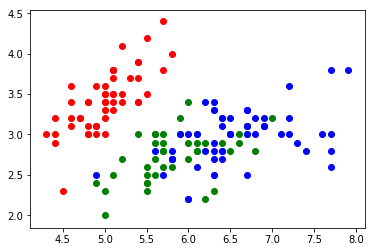

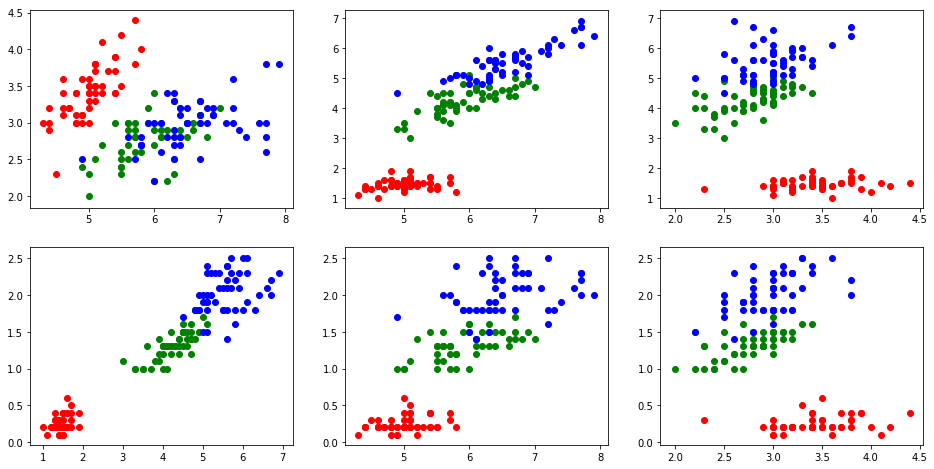

In [8]:
kinds = np.unique(iris.target)
color = ["r", "g", "b"]


# 单图
for i in range(3):
    data_i = iris.data[iris.target==i].astype(np.float32)
    target_i = iris.target[iris.target==i].astype(np.float32)
    plt.scatter(data_i[:, 0], data_i[:, 1], c=color[i])
plt.show()


# 子图，显示两两参数
fig,axes = plt.subplots(2,3,figsize=(16,8))

ax1 = axes[0, 0]
for i in range(3):
    data_i = iris.data[iris.target==i].astype(np.float32)
    target_i = iris.target[iris.target==i].astype(np.float32)
    ax1.scatter(data_i[:, 0], data_i[:, 1], c=color[i])

ax2 = axes[1, 0]
for i in range(3):
    data_i = iris.data[iris.target==i].astype(np.float32)
    target_i = iris.target[iris.target==i].astype(np.float32)
    ax2.scatter(data_i[:, 2], data_i[:, 3], c=color[i])

ax3 = axes[0, 1]
for i in range(3):
    data_i = iris.data[iris.target==i].astype(np.float32)
    target_i = iris.target[iris.target==i].astype(np.float32)
    ax3.scatter(data_i[:, 0], data_i[:, 2], c=color[i])

ax4 = axes[1, 1]
for i in range(3):
    data_i = iris.data[iris.target==i].astype(np.float32)
    target_i = iris.target[iris.target==i].astype(np.float32)
    ax4.scatter(data_i[:, 0], data_i[:, 3], c=color[i])

ax5 = axes[0, 2]
for i in range(3):
    data_i = iris.data[iris.target==i].astype(np.float32)
    target_i = iris.target[iris.target==i].astype(np.float32)
    ax5.scatter(data_i[:, 1], data_i[:, 2], c=color[i])

ax6 = axes[1, 2]
for i in range(3):
    data_i = iris.data[iris.target==i].astype(np.float32)
    target_i = iris.target[iris.target==i].astype(np.float32)
    ax6.scatter(data_i[:, 1], data_i[:, 3], c=color[i])

plt.show()